In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import sklearn as sk
import seaborn as sns

In [2]:
cases_malaysia = pd.read_csv('cases_malaysia.csv')
cases_state = pd.read_csv('cases_state.csv')
clusters = pd.read_csv('clusters.csv')
tests_malaysia = pd.read_csv('tests_malaysia.csv')
tests_state = pd.read_csv('tests_state.csv')

cases_malaysia['date'] = pd.to_datetime(cases_malaysia['date'],errors = 'coerce')
cases_state['date'] = pd.to_datetime(cases_state['date'],errors = 'coerce')
clusters['date_announced'] = pd.to_datetime(clusters['date_announced'],errors = 'coerce')
tests_malaysia['date'] = pd.to_datetime(tests_malaysia['date'],errors = 'coerce')
tests_state['date'] = pd.to_datetime(tests_state['date'],errors = 'coerce')

<h1>DataSets</h1>

<h3>Cases Malaysia</h3>

25/1/2020 - 6/9/2021 <br>
Cluster data starts 1/1/2021

In [3]:
display(cases_malaysia)

print(cases_malaysia.isnull().sum())

cases_malaysia[cases_malaysia.isnull().any(axis=1)]

cases_malaysia['date'] = pd.to_datetime(cases_malaysia['date'],errors = 'coerce')


,date,cases_new,cases_import,cases_recovered,cluster_import,cluster_religious,cluster_community,cluster_highRisk,cluster_education,cluster_detentionCentre,cluster_workplace
0,2020-01-25,4,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-26,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-27,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-28,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-29,3,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
598,2021-09-14,15669,17,18053,0.0,6.0,360.0,35.0,5.0,20.0,498.0
599,2021-09-15,19495,11,18760,0.0,16.0,485.0,91.0,39.0,15.0,556.0
600,2021-09-16,18815,7,16939,0.0,4.0,456.0,47.0,45.0,54.0,775.0
601,2021-09-17,17577,3,22970,0.0,3.0,432.0,31.0,13.0,20.0,1055.0


date                         0
cases_new                    0
cases_import                 0
cases_recovered              0
cluster_import             342
cluster_religious          342
cluster_community          342
cluster_highRisk           342
cluster_education          342
cluster_detentionCentre    342
cluster_workplace          342
dtype: int64


<h3>Cases States</h3>

In [4]:
display(cases_state.head())

print(cases_state.isnull().sum())



,date,state,cases_import,cases_new,cases_recovered
0,2020-01-25,Johor,4,4,0
1,2020-01-25,Kedah,0,0,0
2,2020-01-25,Kelantan,0,0,0
3,2020-01-25,Melaka,0,0,0
4,2020-01-25,Negeri Sembilan,0,0,0


date               0
state              0
cases_import       0
cases_new          0
cases_recovered    0
dtype: int64


<h3>Tests Malaysia</h3>

In [5]:
display(tests_malaysia)

tests_malaysia.isnull().sum()

,date,rtk-ag,pcr
0,2020-01-24,0,2
1,2020-01-25,0,5
2,2020-01-26,0,14
3,2020-01-27,0,24
4,2020-01-28,0,53
...,...,...,...
598,2021-09-13,84811,50451
599,2021-09-14,83980,66191
600,2021-09-15,79454,62947
601,2021-09-16,47522,48838


date      0
rtk-ag    0
pcr       0
dtype: int64

<h3>Tests State</h3>

In [6]:
display(tests_state.head())

tests_state.isnull().sum()

,date,state,rtk-ag,pcr
0,2021-07-01,Johor,2749,3670
1,2021-07-01,Kedah,2073,1297
2,2021-07-01,Kelantan,1348,1966
3,2021-07-01,Melaka,1049,2132
4,2021-07-01,Negeri Sembilan,2151,3306


date      0
state     0
rtk-ag    0
pcr       0
dtype: int64

<h3>Clusters</h3>

In [7]:
display(clusters.head())

clusters.isnull().sum()

,cluster,state,district,date_announced,date_last_onset,category,status,cases_new,cases_total,cases_active,tests,icu,deaths,recovered
0,Kluster Warga Jepun,WP Kuala Lumpur,Lembah Pantai,2020-03-01,2020-03-09,import,ended,0,3,0,267,0,0,3
1,Kluster UDA,"WP Kuala Lumpur, WP Putrajaya, Selangor, Neger...",Pelbagai,2020-03-04,2020-03-01,import,ended,0,144,0,1864,0,2,142
2,Kluster Keagamaan (Tabligh SP),Semua Negeri,Pelbagai,2020-03-13,2020-03-11,religious,ended,0,2022,0,42023,0,34,1988
3,Kluster Tabligh New Delhi,"Selangor, Negeri Sembilan, WP Kuala Lumpur & W...",Pelbagai,2020-03-16,2020-03-20,import,ended,0,24,0,57,0,0,24
4,Kluster AIROD,Pahang,Kuantan,2020-03-31,2020-03-31,workplace,ended,0,65,0,734,0,0,65


cluster            0
state              0
district           0
date_announced     0
date_last_onset    0
category           0
status             0
cases_new          0
cases_total        0
cases_active       0
tests              0
icu                0
deaths             0
recovered          0
dtype: int64

In [8]:
nameList = ['johor','kedah','kelantan','melaka','nSembilan','pahang','perak','perlis','pPinang','sabah','sarawak','selangor','terengganu','kl','labuan','pj']


def getStateCorrelation (df):
    
    johor = df[df['state'] == 'Johor'].reset_index()
    kedah = df[df['state'] == 'Kedah'].reset_index()
    kelantan = df[df['state'] == 'Kelantan'].reset_index()
    melaka = df[df['state'] == 'Melaka'].reset_index()
    nSembilan = df[df['state'] == 'Negeri Sembilan'].reset_index()
    pahang = df[df['state'] == 'Pahang'].reset_index()
    perak = df[df['state'] == 'Perak'].reset_index()
    perlis = df[df['state'] == 'Perlis'].reset_index()
    pPinang = df[df['state'] == 'Pulau Pinang'].reset_index()
    sabah = df[df['state'] == 'Sabah'].reset_index()
    sarawak = df[df['state'] == 'Sarawak'].reset_index()
    selangor = df[df['state'] == 'Selangor'].reset_index()
    terengganu = df[df['state'] == 'Terengganu'].reset_index()
    kl = df[df['state'] == 'W.P. Kuala Lumpur'].reset_index()
    labuan = df[df['state'] == 'W.P. Labuan'].reset_index()
    pj = df[df['state'] == 'W.P. Putrajaya'].reset_index()
    
    stateList = [johor,kedah,kelantan,melaka,nSembilan,pahang,perak,perlis,pPinang,sabah,sarawak,selangor,terengganu,kl,labuan,pj]
    
    i=0
    for i in range(14):
        tempDf = stateList[i]
        print ("Pahang and ",nameList[i])
        print (pahang.corrwith(tempDf))
        print("\n")
        
    j=0
    for j in range(14):
        tempDf2 = stateList[j]
        print ("Johor and ",nameList[j])
        print (johor.corrwith(tempDf2))
        print("\n")

In [9]:
#getStateCorrelation(cases_state)

<h1>Exploratory Data Analysis</h1>

<h3>Cases Malaysia</h3>

Index(['date', 'cases_new', 'cases_import', 'cases_recovered',
       'cluster_import', 'cluster_religious', 'cluster_community',
       'cluster_highRisk', 'cluster_education', 'cluster_detentionCentre',
       'cluster_workplace'],
      dtype='object')


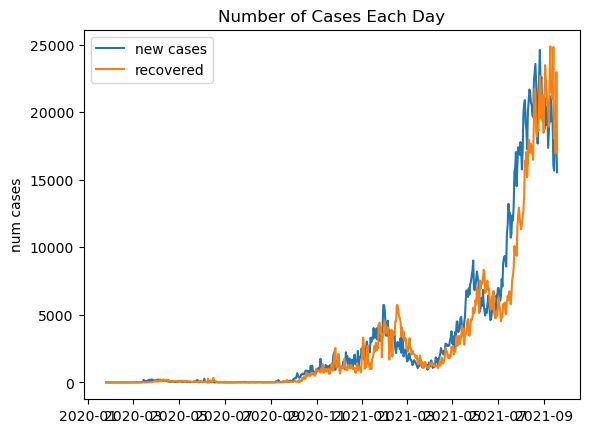

In [9]:
print(cases_malaysia.columns)

# Cases each day
plt.plot(cases_malaysia['date'],cases_malaysia['cases_new'],label = "new cases")
plt.plot(cases_malaysia['date'], cases_malaysia['cases_recovered'], label = "recovered")
plt.title("Number of Cases Each Day")
plt.ylabel("num cases")
plt.legend()
plt.show()


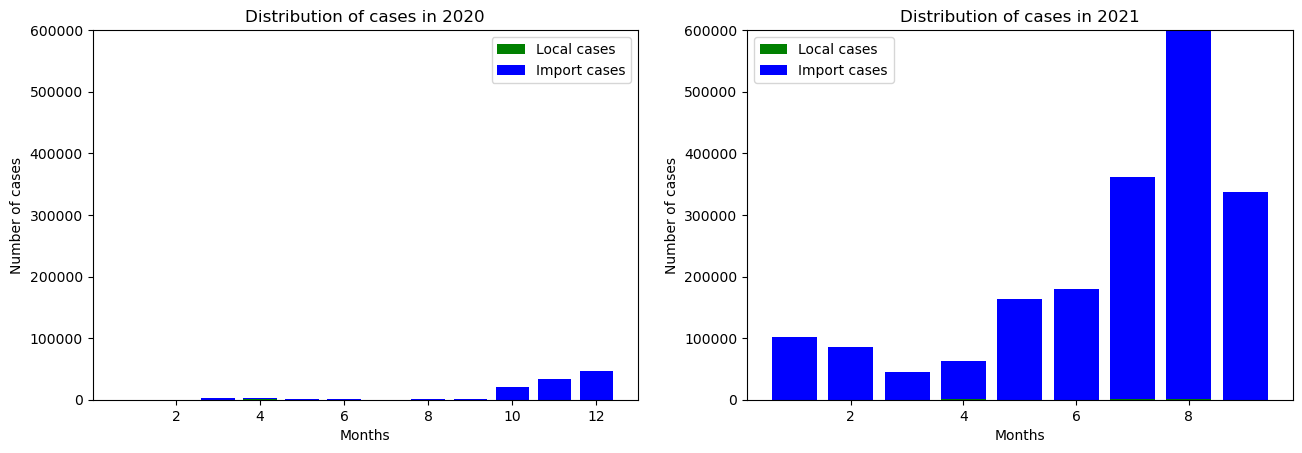

In [10]:
# Distribution of cases each month
cases_2020 = cases_malaysia[cases_malaysia['date'].dt.year == 2020]
cases_2020 = cases_2020.groupby(cases_2020['date'].dt.month).sum()
cases_2020 = cases_2020.reset_index()

cases_2021 = cases_malaysia[cases_malaysia['date'].dt.year == 2021]
cases_2021 = cases_2021.groupby(cases_2021['date'].dt.month).sum()
cases_2021 = cases_2021.reset_index()

plt.subplot(1,2,1)
plt.bar(cases_2020['date'],cases_2020['cases_import'],color = 'g')
plt.bar(cases_2020['date'],cases_2020['cases_new'] - cases_2020['cases_import'], color = 'b', bottom = cases_2020['cases_import'])
plt.ylim(0,600000)
plt.xlabel("Months")
plt.ylabel("Number of cases")
plt.title("Distribution of cases in 2020")
plt.legend(["Local cases","Import cases"])

plt.subplot(1,2,2)
plt.bar(cases_2021['date'],cases_2021['cases_import'],color = 'g')
plt.bar(cases_2021['date'],cases_2021['cases_new'] - cases_2021['cases_import'], color = 'b', bottom = cases_2021['cases_import'])
plt.ylim(0,600000)
plt.xlabel("Months")
plt.ylabel("Number of cases")
plt.title("Distribution of cases in 2021")
plt.legend(["Local cases","Import cases"])

plt.subplots_adjust(right = 2)
plt.show()


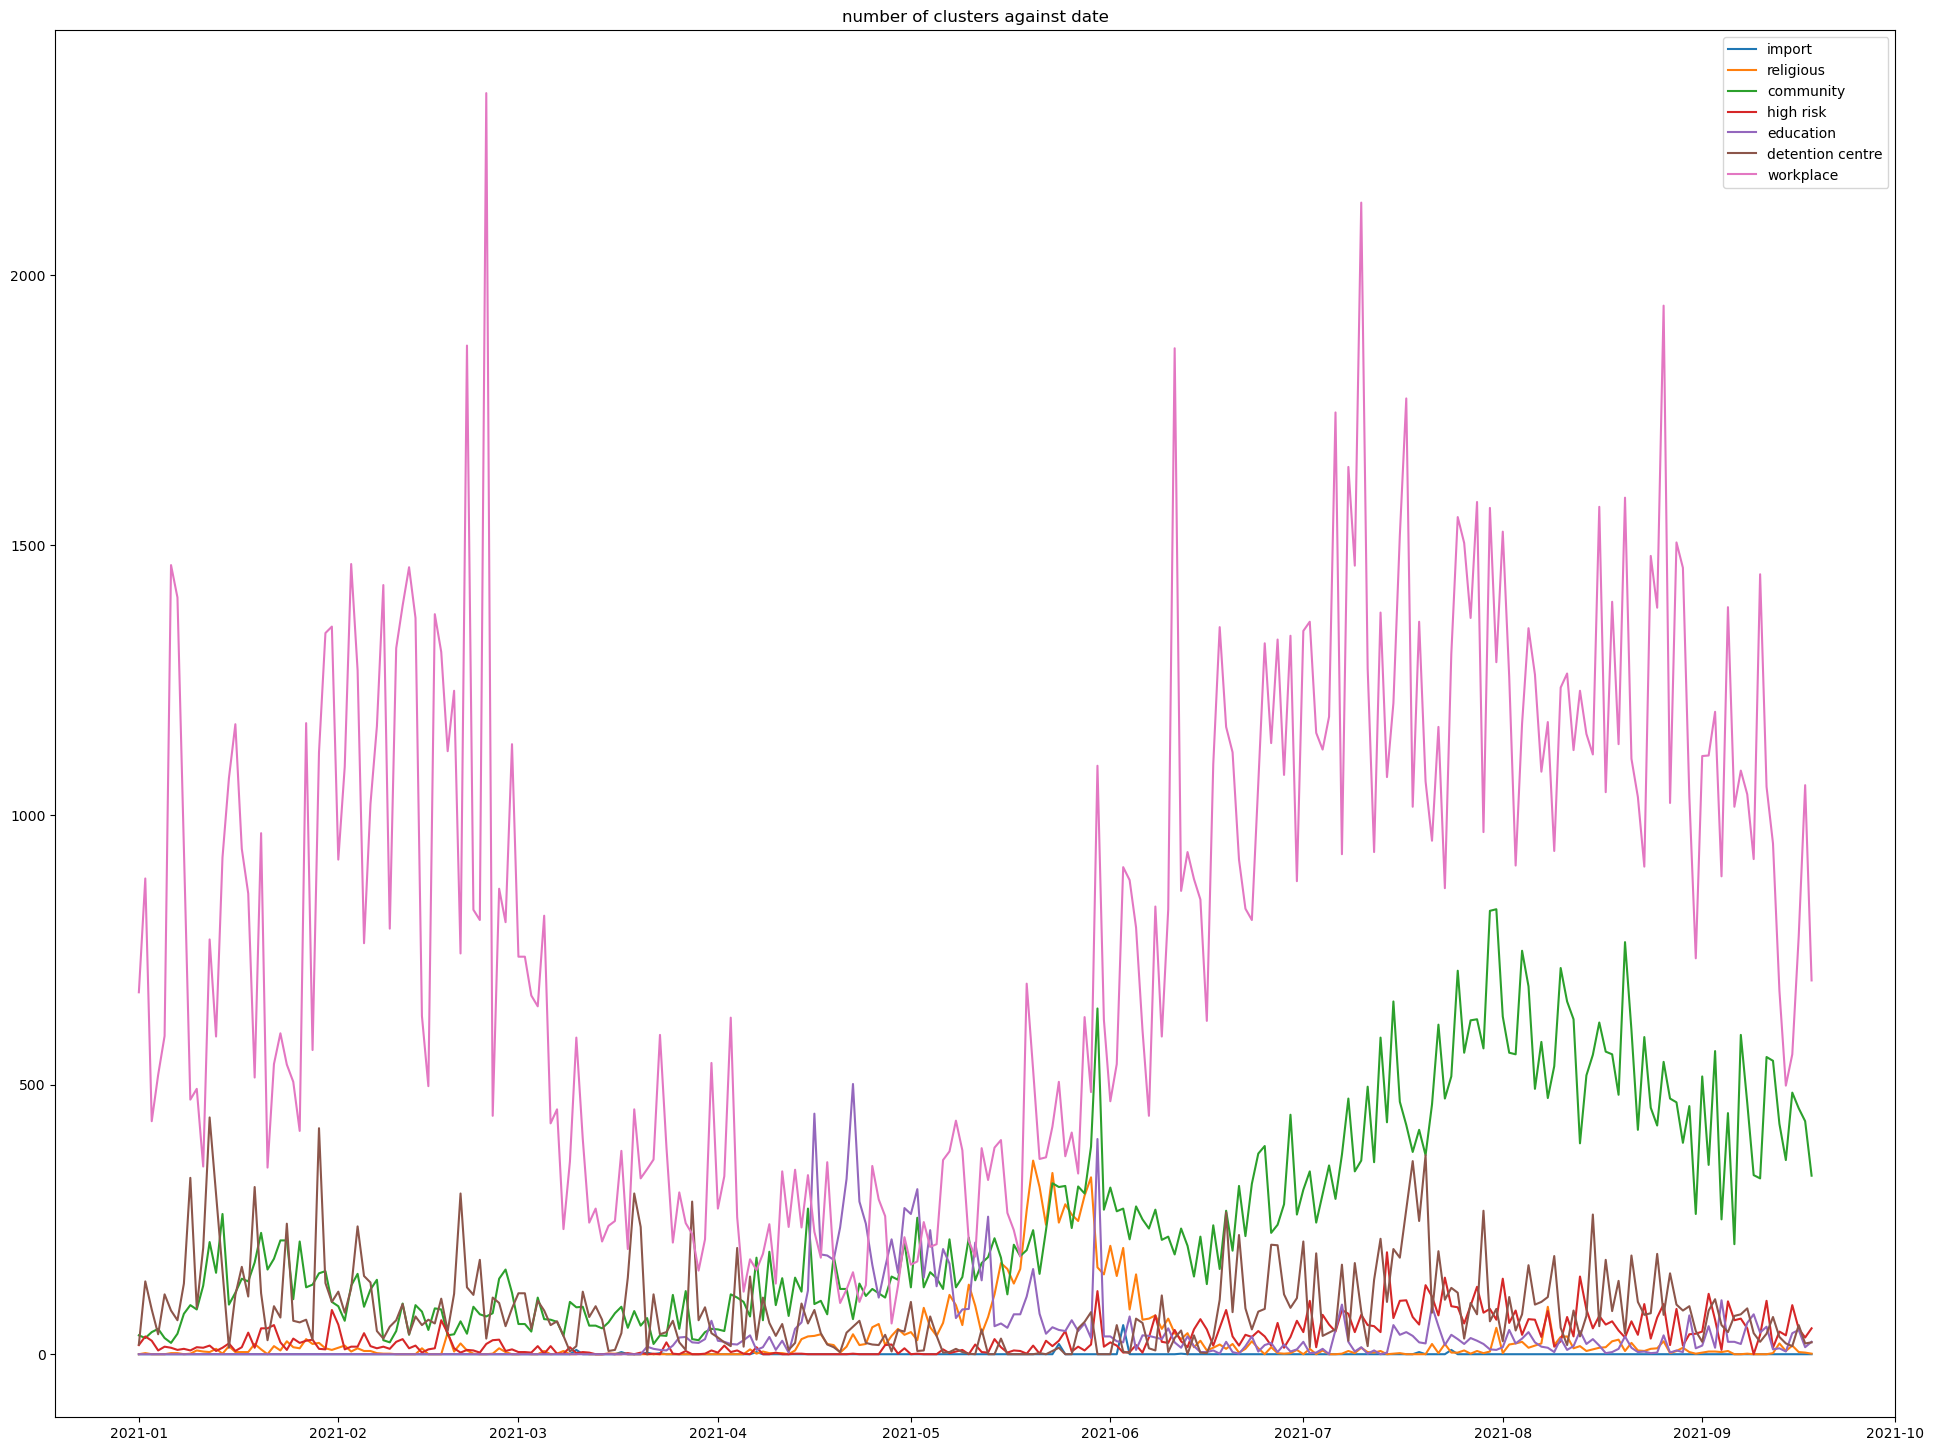

In [11]:
plt.plot(cases_malaysia['date'],cases_malaysia['cluster_import'],label = 'import')
plt.plot(cases_malaysia['date'],cases_malaysia['cluster_religious'],label = 'religious')
plt.plot(cases_malaysia['date'],cases_malaysia['cluster_community'],label = 'community')
plt.plot(cases_malaysia['date'],cases_malaysia['cluster_highRisk'],label = 'high risk')
plt.plot(cases_malaysia['date'],cases_malaysia['cluster_education'],label = 'education')
plt.plot(cases_malaysia['date'],cases_malaysia['cluster_detentionCentre'],label = 'detention centre')
plt.plot(cases_malaysia['date'],cases_malaysia['cluster_workplace'],label = 'workplace')

plt.subplots_adjust(right=3,top=3)
plt.title("number of clusters against date")
plt.legend()
plt.show()

<h2>Cases State</h2>

Index(['date', 'state', 'cases_import', 'cases_new', 'cases_recovered'], dtype='object')


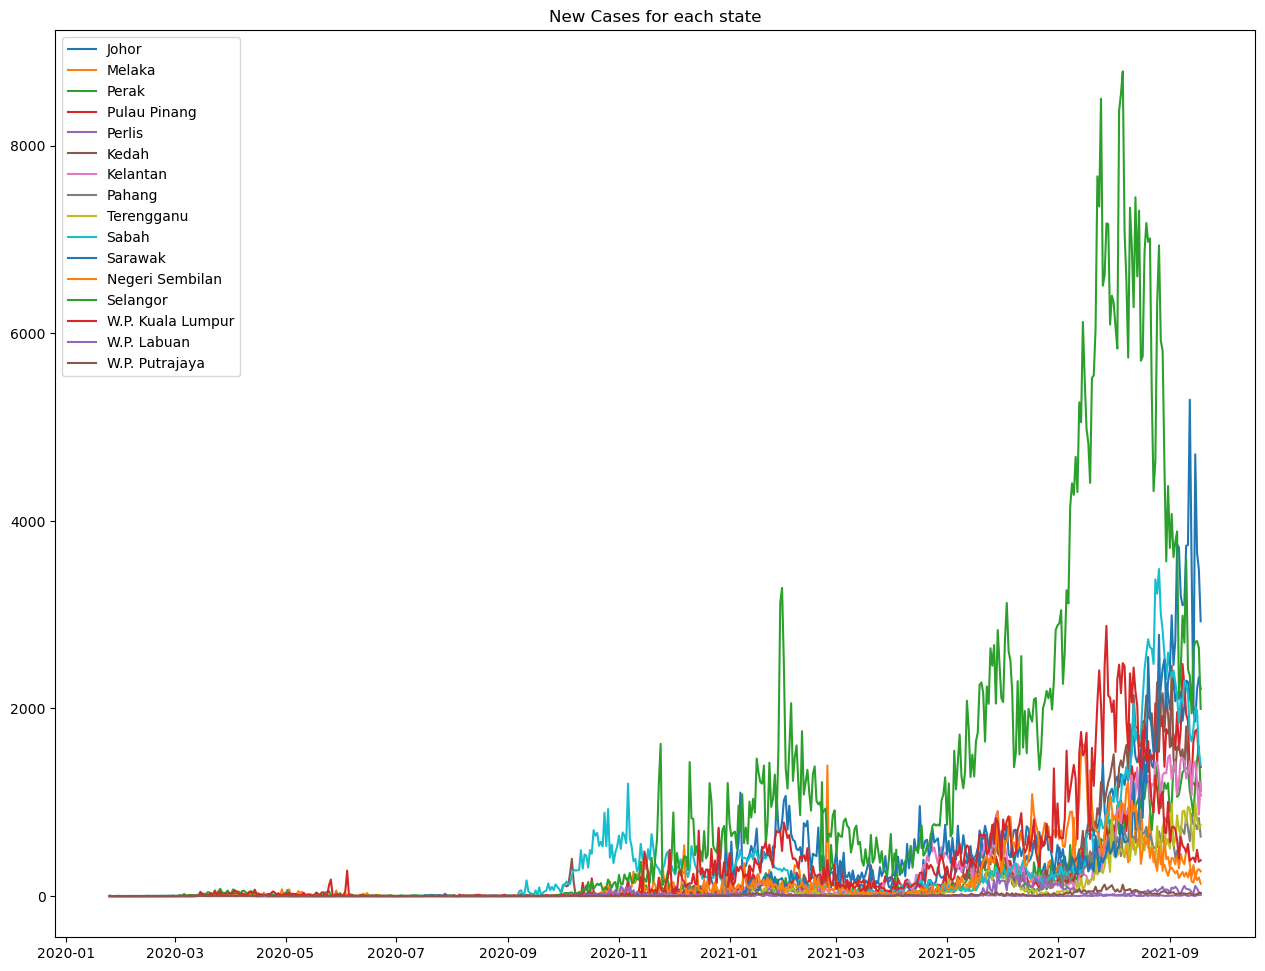

In [12]:
# Cases State

print(cases_state.columns)
states = ['Johor','Melaka','Perak','Pulau Pinang', 'Perlis', 'Kedah', 'Kelantan', 'Pahang', 'Terengganu', 'Sabah', 'Sarawak', 'Negeri Sembilan', 'Selangor', 'W.P. Kuala Lumpur', 'W.P. Labuan', 'W.P. Putrajaya']

for i in states:
    plt.plot(cases_state[cases_state['state'] == i]['date'], cases_state[cases_state['state'] == i]['cases_new'], label = i)
    
plt.title('New Cases for each state')
plt.legend()
plt.subplots_adjust(top = 2, right = 2)
plt.show()
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'johor'], label='Johor')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Melaka'], label='Melaka')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Perak'], label='Perak')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Pulau Pinang'], label='Pulau Pinang')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Perlis'], label='Perlis')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Kedah'], label='Kedah')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Kelantan'], label='Kelantan')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Pahang'], label='Pahang')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Terenganu'], label='Terenganu')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Sabah'], label='Sabah')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Sarawak'], label='Sarawak')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Negeri Sembilan'], label='Negeri Sembilan')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'Selangor'], label='Selangor')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'W.P. Labuan'], label='W.P. Labuan')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'W.P. Putrajaya'], label='Putrajaya')
#plt.plot(cases_state[cases_state['date'],cases_state['state'] == 'W.P. Kuala Lumpur'], label='Kuala Lumpur')

#plt.title('cases in states')
#plt.x

In [13]:
print(cases_state['state'].unique)

<bound method Series.unique of 0                   Johor
1                   Kedah
2                Kelantan
3                  Melaka
4         Negeri Sembilan
              ...        
9643             Selangor
9644           Terengganu
9645    W.P. Kuala Lumpur
9646          W.P. Labuan
9647       W.P. Putrajaya
Name: state, Length: 9648, dtype: object>


<h2>Tests Malaysia

In [ ]:
# Tests Malaysia

<h2>Tests Malaysia</h2>

In [ ]:
# Tests State

<h2>Cluster</h2>

In [ ]:
# Clusters

<h1>Correlation Analysis</h1>

In [14]:
# Combining and reshaping the dataset

cases_malaysia['state'] = 'malaysia'

mainDf = pd.concat([cases_state,cases_malaysia], join = 'inner')

#mainDf = cases_state.copy()

#print(cases_malaysia.isnull().sum())
#print(cases_state.isnull().sum())
#print(mainDf.isnull().sum())

#testDf['Tommorow_new_cases'] = 
mainDf


,date,state,cases_import,cases_new,cases_recovered
0,2020-01-25,Johor,4,4,0
1,2020-01-25,Kedah,0,0,0
2,2020-01-25,Kelantan,0,0,0
3,2020-01-25,Melaka,0,0,0
4,2020-01-25,Negeri Sembilan,0,0,0
...,...,...,...,...,...
598,2021-09-14,malaysia,17,15669,18053
599,2021-09-15,malaysia,11,19495,18760
600,2021-09-16,malaysia,7,18815,16939
601,2021-09-17,malaysia,3,17577,22970


In [15]:
testJohor = mainDf[mainDf['state'] == 'Johor']
testKedah = mainDf[mainDf['state'] == 'Kedah']

testJohor = testJohor.fillna(0)
testKedah = testKedah.fillna(0)

testJohor = testJohor.tail(20)

cumulative = 0
activeJohor = []
for i in testJohor.index:
    cumulative = cumulative + testJohor['cases_new'][i] - testJohor['cases_recovered'][i]
    activeJohor.append(cumulative)
    
testJohor['active_cases'] = activeJohor



testJohor

,date,state,cases_import,cases_new,cases_recovered,active_cases
9328,2021-08-30,Johor,0,2265,1355,910
9344,2021-08-31,Johor,0,2159,1239,1830
9360,2021-09-01,Johor,0,1993,1390,2433
9376,2021-09-02,Johor,0,2145,1442,3136
9392,2021-09-03,Johor,0,2331,1244,4223
9408,2021-09-04,Johor,1,2077,1503,4797
9424,2021-09-05,Johor,0,2165,1335,5627
9440,2021-09-06,Johor,2,2101,1342,6386
9456,2021-09-07,Johor,0,2174,1702,6858
9472,2021-09-08,Johor,0,1867,1789,6936


In [16]:
# Some dates where cases recovered were 0

null = mainDf[mainDf.isnull().any(axis=1)]
null.groupby('date').count()

,state,cases_import,cases_new,cases_recovered
date,,,,


<h1>Place Holder Dataset </h1>

In [17]:
# get the y value for the model (number of tommorows cases)
cases = []
for j in cases_malaysia.index:
    cases.append(cases_malaysia['cases_new'][j])

cases.pop(0)
cases.append(0)

cases_malaysia['predict_cases'] = cases

# Calculate active cases
cumulative = 0
activecase = []
for i in cases_malaysia.index:
    cumulative = cumulative + cases_malaysia['cases_new'][i] - cases_malaysia['cases_recovered'][i]
    activecase.append(cumulative)
    
cases_malaysia['active_cases'] = activecase


# Merging malaysia df and calculate the positivity rate and active cases
malaysia = cases_malaysia.merge(tests_malaysia, on ='date')

# Calculate daily positivity rate
malaysia['daily_positivity_rate'] = round(malaysia['cases_new'] / (malaysia['rtk-ag'] + malaysia['pcr']) * 100,2)

malaysia = malaysia.drop(['cluster_import','cluster_religious','cluster_community','cluster_highRisk','cluster_education','cluster_detentionCentre','cluster_workplace'],axis = 1)

malaysia = malaysia

malaysia

,date,cases_new,cases_import,cases_recovered,state,predict_cases,active_cases,rtk-ag,pcr,daily_positivity_rate
0,2020-01-25,4,4,0,malaysia,0,4,0,5,80.00
1,2020-01-26,0,0,0,malaysia,0,4,0,14,0.00
2,2020-01-27,0,0,0,malaysia,0,4,0,24,0.00
3,2020-01-28,0,0,0,malaysia,3,4,0,53,0.00
4,2020-01-29,3,3,0,malaysia,1,7,0,71,4.23
...,...,...,...,...,...,...,...,...,...,...
597,2021-09-13,16073,21,24813,malaysia,15669,249248,84811,50451,11.88
598,2021-09-14,15669,17,18053,malaysia,19495,246864,83980,66191,10.43
599,2021-09-15,19495,11,18760,malaysia,18815,247599,79454,62947,13.69
600,2021-09-16,18815,7,16939,malaysia,17577,249475,47522,48838,19.53


In [18]:
nameList = ['Johor','Kedah','Kelantan','Melaka','Negeri Sembilan','Pahang','Perak','Perlis','Pulau Pinang','Sabah','Sarawak','Selangor','Terengganu','W.P. Kuala Lumpur','W.P. Labuan','W.P. Putrajaya']
cases_state

finalStates = pd.DataFrame()

stateActive = []

for l in nameList:
    
    cumulative = 0
    stateDf = cases_state[cases_state['state'] == l]
    
    
    for k in stateDf.index:
        cumulative = cumulative + stateDf['cases_new'][k] - stateDf['cases_recovered'][k]
        stateActive.append(cumulative)
        #print(cumulative)
        
    tempString = "active_case_"+ l
    finalStates[tempString] = stateActive.copy()

    stateActive.clear()
    
finalStates.tail(20)


,active_case_Johor,active_case_Kedah,active_case_Kelantan,active_case_Melaka,active_case_Negeri Sembilan,active_case_Pahang,active_case_Perak,active_case_Perlis,active_case_Pulau Pinang,active_case_Sabah,active_case_Sarawak,active_case_Selangor,active_case_Terengganu,active_case_W.P. Kuala Lumpur,active_case_W.P. Labuan,active_case_W.P. Putrajaya
583,25728,19693,13311,7747,6061,8963,11254,728,22695,32927,24443,83898,6084,17854,212,500
584,26648,19765,13557,7553,5803,9216,11291,737,22830,32900,25637,84540,6187,17179,209,478
585,27251,19783,14056,7341,5568,9235,11428,730,22811,32985,26586,81422,6120,16221,200,482
586,27954,19942,14102,7049,5393,8938,11393,782,22782,31959,28162,78504,6523,15549,204,498
587,29041,19004,14510,6884,5129,8656,12034,804,22993,32634,27867,75223,6524,14696,205,509
588,29615,18476,14678,6345,4968,8317,12514,863,23268,32962,28349,72029,6887,14233,200,484
589,30445,18270,14082,6316,4753,8234,12780,862,23707,32177,30127,70545,7153,13871,204,485
590,31204,17930,13776,6264,4483,8088,12843,863,23715,30515,32070,68034,7381,13321,209,466
591,31676,17630,13943,6379,4323,8244,12754,818,23681,31035,33693,65796,7471,12700,206,458
592,31754,17282,14190,6649,4345,8535,12895,860,24883,27911,35118,62723,7854,12156,199,485


In [19]:
test_state = cases_state[cases_state['state'] == 'Johor']

cumulative = 0
active_case = []
for k in test_state.index:
        cumulative = cumulative + test_state['cases_new'][k] - test_state['cases_recovered'][k]
        active_case.append(cumulative)
        #print(cumulative)
    
test_state['active_cases'] = active_case
display(test_state)
test_state = test_state[['date','active_cases']]

#test_state

<ipython-input-19-e0ed7fc92b59>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_state['active_cases'] = active_case


,date,state,cases_import,cases_new,cases_recovered,active_cases
0,2020-01-25,Johor,4,4,0,4
16,2020-01-26,Johor,0,0,0,4
32,2020-01-27,Johor,0,0,0,4
48,2020-01-28,Johor,0,0,0,4
64,2020-01-29,Johor,2,2,0,6
...,...,...,...,...,...,...
9568,2021-09-14,Johor,4,1974,2108,32053
9584,2021-09-15,Johor,1,1860,1943,31970
9600,2021-09-16,Johor,0,2206,2084,32092
9616,2021-09-17,Johor,0,2334,2269,32157


<h1>Formatting the state DF</h1>

In [20]:
# Formatting the State column

finalState = pd.DataFrame()

for i in nameList:
   
    tempDf = cases_state[cases_state['state'] == i]

    cumulative = 0
    activeList = []

    for h in tempDf.index:
        cumulative = cumulative + tempDf['cases_new'][h] - tempDf['cases_recovered'][h]
        activeList.append(cumulative)

    tempString = "active_case_" + i 
    tempDf[tempString] = activeList
    
    tempString2 = 'new_cases_' + i
    tempDf[tempString2] = tempDf['cases_new']
        
    tempDf = tempDf[['date',tempString2,tempString]]
    
    if (i == 'Johor'):
        finalState = tempDf
        
    else:
        finalState = finalState.merge(tempDf, on = 'date')
        
finalState
        

<ipython-input-20-962f5df6f79e>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf[tempString] = activeList
<ipython-input-20-962f5df6f79e>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempDf[tempString2] = tempDf['cases_new']


,date,new_cases_Johor,active_case_Johor,new_cases_Kedah,active_case_Kedah,new_cases_Kelantan,active_case_Kelantan,new_cases_Melaka,active_case_Melaka,new_cases_Negeri Sembilan,...,new_cases_Selangor,active_case_Selangor,new_cases_Terengganu,active_case_Terengganu,new_cases_W.P. Kuala Lumpur,active_case_W.P. Kuala Lumpur,new_cases_W.P. Labuan,active_case_W.P. Labuan,new_cases_W.P. Putrajaya,active_case_W.P. Putrajaya
0,2020-01-25,4,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-26,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-27,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-28,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-29,2,6,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,2021-09-14,1974,32053,1207,14351,1406,13910,329,6031,143,...,2632,47492,483,8362,411,9547,3,226,14,404
599,2021-09-15,1860,31970,1178,14118,1434,13891,190,5805,222,...,2710,46625,993,8970,363,9342,0,221,16,386
600,2021-09-16,2206,32092,1233,13730,1222,13814,269,5746,170,...,2718,45333,814,9499,493,9156,11,222,22,383
601,2021-09-17,2334,32157,1173,13253,869,13102,287,5538,198,...,2646,44436,719,8716,366,8818,10,228,31,377


<h1> Merging Final Dataframe and getting y columns for 4 states</h1>

In [21]:
# pahang johor kedah selangor

finalDf = malaysia.merge(finalState, on = 'date')

finalDf

,date,cases_new,cases_import,cases_recovered,state,predict_cases,active_cases,rtk-ag,pcr,daily_positivity_rate,...,new_cases_Selangor,active_case_Selangor,new_cases_Terengganu,active_case_Terengganu,new_cases_W.P. Kuala Lumpur,active_case_W.P. Kuala Lumpur,new_cases_W.P. Labuan,active_case_W.P. Labuan,new_cases_W.P. Putrajaya,active_case_W.P. Putrajaya
0,2020-01-25,4,4,0,malaysia,0,4,0,5,80.00,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-26,0,0,0,malaysia,0,4,0,14,0.00,...,0,0,0,0,0,0,0,0,0,0
2,2020-01-27,0,0,0,malaysia,0,4,0,24,0.00,...,0,0,0,0,0,0,0,0,0,0
3,2020-01-28,0,0,0,malaysia,3,4,0,53,0.00,...,0,0,0,0,0,0,0,0,0,0
4,2020-01-29,3,3,0,malaysia,1,7,0,71,4.23,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2021-09-13,16073,21,24813,malaysia,15669,249248,84811,50451,11.88,...,1947,49224,704,8649,398,10162,11,228,16,419
598,2021-09-14,15669,17,18053,malaysia,19495,246864,83980,66191,10.43,...,2632,47492,483,8362,411,9547,3,226,14,404
599,2021-09-15,19495,11,18760,malaysia,18815,247599,79454,62947,13.69,...,2710,46625,993,8970,363,9342,0,221,16,386
600,2021-09-16,18815,7,16939,malaysia,17577,249475,47522,48838,19.53,...,2718,45333,814,9499,493,9156,11,222,22,383


In [22]:
q4 = ['Pahang','Johor','Kedah','Selangor']

df = pd.DataFrame()

for i in q4:
    tempDf = cases_state[cases_state['state'] == i]
    tempList = []
    
    for j in tempDf.index:
        tempList.append(tempDf['cases_new'][j])
    tempList.pop(0)
        
    tempString = i+'Y'
    
    if (i=='Pahang'):
        df = pd.DataFrame(tempList,columns = [tempString])
        
    else:
        df[tempString] = tempList
        
    tempList.clear()
        
display(df)

PahangY = df['PahangY']
JohorY = df['JohorY']
KedahY = df['KedahY']
SelangorY = df['SelangorY']


,PahangY,JohorY,KedahY,SelangorY
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,2,1,0
4,0,1,0,0
...,...,...,...,...
597,763,1974,1207,2632
598,766,1860,1178,2710
599,712,2206,1233,2718
600,832,2334,1173,2646


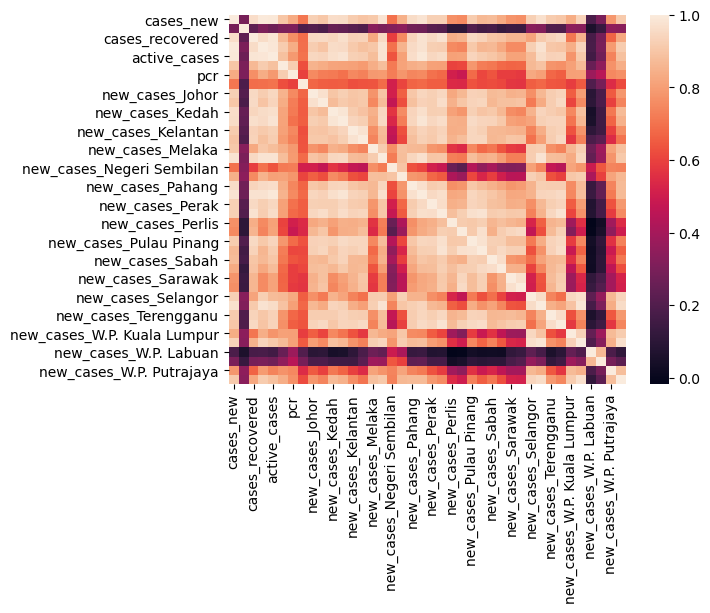

In [23]:
sns.heatmap(finalDf.corr())
plt.show()

# Naive Bayes Classifications

### Pahang

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict

In [26]:
X = finalDf.drop(['date','predict_cases','state'], axis=1)
y = PahangY

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

In [28]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [29]:
y_pred=nb.predict(X_test)
y_pred

array([  0,   0, 288,   0,  12,  15,   0,  54,  17,  15,   0, 288,   3,
       288,   0,   0,   0, 288,   1, 288,   0,  61,  13,   0, 288,   0,
        14, 288,   0,   0,   0,  54, 288,   0,  34, 288,  30,   0,  17,
         8,   3,   0,  17,   2, 288,   0, 288,   0, 288,  34,   5,  15,
        63,   0,  13,  15, 288,   0, 288, 288, 288,   0,   0,  28,   0,
       288,   0,  78, 288,   0,  19, 288,  11,   0,  12,   0,   0, 288,
         5,  12,  17,  54,   3, 288,  11,   1,   0, 288,   0,   0,   0,
         0,   5, 288,   5,   1,   2,   1,   3, 288,   0, 288,  12,  13,
         0,   0,   0,   0,   0,   0,   0,   5,   0, 288,   0, 288,  14,
       288,  63,   0, 288,   0,   5,  54,  15,   0,   1,   1, 288,  19,
        13,  12, 288, 288,   1,   1,   2,   0, 288, 288,   0,   4,   3,
         0,   0,   1,   0,  54,  12,   1,  11,   0,  12,   0,  30,  34,
         0,   1,   0,  54,   2, 288,   5,   0,   1,  19,   0,   0, 288,
         2,  61,   3,   4,   0,  78,   0,  17, 288,   0,  15, 28

### Accuracy score PAHANG

In [30]:
#Predict Score Pahang
nb.score(X_test, y_test)

0.3149171270718232

## Johor

In [31]:
X = finalDf.drop(['date','predict_cases','state'], axis=1)
y = JohorY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)


In [32]:
nb.fit(X_train, y_train)
y_pred=nb.predict(X_test)
y_pred

array([  2,  13, 412,   0, 412, 412,   0, 412, 102, 412,  13, 412, 412,
       412,   0,   0,   0, 412,  16, 412,   0, 412, 103,   0, 412,   0,
       412, 412,   0,   0,   5, 412, 468,   0, 412, 412, 314,   8, 121,
       314, 121,   0, 100,   9, 412,   0, 412,   0, 412, 412,   7, 412,
       412,   0, 170, 412, 412,   0, 412, 412, 412,   0,   0, 412,   0,
       412,   0, 412, 412,   0, 412, 412, 412,   0, 100,   0,   0, 412,
        16, 412, 314, 412, 102, 412, 103,   0,   0, 412,   0,  14,   0,
         5,  16, 412,  16,   0,   9,   7, 412, 412,   0, 412, 412, 100,
         0,   0,   0,   0,   0,   0,   5,  16,   0, 412,   0, 412, 412,
       412, 412,   0, 412,   8,  16, 412, 100,   0,   5,   0, 412, 490,
       103, 102, 412, 412,   2,  10, 102,   0, 412, 412,   0, 100, 412,
         0,   0,   7,   2, 412, 102,  16, 103,   0,   9,   0, 412, 205,
         0,   0,   0, 412,   2, 412,  16,   0,   7, 314,   0,   0, 412,
       102, 412, 120,   8,   0, 412,   0, 103, 412,   0, 130, 41

### Accuracy score Johor

In [33]:
nb.score(X_test, y_test)

0.20441988950276244

# KNN Classification


## Pahang

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [36]:
X = finalDf.drop(['date','predict_cases','state'], axis=1)
y = PahangY

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Accuracy score Pahang

In [39]:
knn.score(X_test, y_test)

0.35359116022099446

## Johor

In [40]:
X = finalDf.drop(['date','predict_cases','state'], axis=1)
y = JohorY
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=0)
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Accuracy of Johor

In [41]:
knn.score(X_test, y_test)

0.2265193370165746

# Suppport Vector Machine

In [42]:
from sklearn import svm

## Pahang

In [43]:
X = finalDf.drop(['date','predict_cases','state'], axis=1)
y = PahangY
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=0)

In [44]:
#Create a svm Classifier
clf = svm.SVC(kernel='linear', gamma='auto') # Linear Kernel

In [45]:
#Train the model using the training sets
clf.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [46]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [47]:
y_pred

array([  0,   2,  75,   0,  16,  79,   0,  85,  16, 143,   4,  54,  42,
       111,   1,   0,  16, 700,   3, 143,   0, 100,  19,   0,  77,   0,
        28, 798,   0,   0,   1,  63, 257,   7,  25, 603,  31,   1,  32,
         3,   7,   0,  36,   2, 610,   0, 152,   0, 598,  92,   8, 143,
        61,   0,  10,  41, 100,   0, 150, 237, 853,   0,   0,  21,   0,
       227,   0,  99, 715,   0,  31, 584,  19,   0,  79,   1,   0, 675,
         4,  12,   3,  28,  30, 222,  32,  15,   0,  66,   1,   0,   0,
         0,  11, 584,   3,   1,   0,   5,   3, 540,   0, 426,  12,  13,
         0,   0,   0,   0,   0,   0,   0,  11,   0, 714,   0, 406,   9,
       766,  72,   0,  89,   0,  27, 200,  30,   0,   0,   0, 766,   8,
         6,  12, 254, 540,   1,   0,   0,   1, 426, 766,   0,   2,   3,
         0,   0,   5,   2, 200,   0,   1,  16,   0,   2,   0,  28,  55,
         0,   2,   0,  63,   0, 250,  24,   0,   0,  38,   0,   0, 638,
        12, 131,   3,   0,   0,  97,   0,  32, 664,   0,  39, 38

In [48]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.30386740331491713


In [49]:
print("Precision:",metrics.precision_score(y_test, y_pred  , average = 'micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred  , average = 'micro'))

Precision: 0.30386740331491713
Recall: 0.30386740331491713


# Loggistic Regreession

## Pahang

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X = finalDf.drop(['date','predict_cases','state'], axis=1)
y = PahangY

In [51]:
X_train, X_test, y_train , y_test = train_test_split(X,y.values.ravel() , test_size = 0.3, random_state = 0)
logreg = LogisticRegression(solver = 'lbfgs' , max_iter = 1000)

In [52]:
logreg.fit(X_train , y_train)

D:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [53]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.22


# CART - Classification Tree

## Pahang

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [55]:
X = finalDf.drop(['date','predict_cases','state'], axis=1)
y = PahangY

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [57]:
clf = DecisionTreeClassifier()
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [58]:
clf = clf.fit(X_train, y_train)

In [59]:
y_pred = clf.predict(X_test)
y_pred

array([  0,   0, 178,   0,  57,  48,   3,  85,  17,  35,   4,  54,   3,
       200,   0,   0,   0, 486,   5,  41,   0,  51,  23,   0, 162,   2,
        32, 486,   0,   0,   0,  51, 257,   0,  41, 288,  72,   1,  81,
         7,   7,   0,   0,   0, 598,   0, 139,   0, 714,  20,   8,  41,
        63,   0,   4,  11,  97,   0, 257, 219, 853,   0,   2,  41,   0,
       227,   0, 232, 463,   0,  38,  50,  12,   0,   4,   1,   0, 486,
         0,  12,   7,  28,  42, 457,  12,   0,   0,  63,   0,   2,   0,
         1,   8, 853,   5,   5,   0,   0,   3, 475,   0, 386,  19,  19,
         0,   2,   0,   0,   0,   0,   1,   8,   0, 794,   1, 261,  11,
        50,  30,   0,  50,   0,   8, 250,  30,   0,   0,   1,  50,   7,
        17,   6, 219, 521,   1,   0,   2,   0, 628, 742,   3,  33,   3,
         0,   0,   0,   2, 118,   2,   8,  17,   0,   1,   0,  30,  97,
         0,   0,   0,  51,   0, 200,  13,   0,   0,  19,   7,   0, 628,
         1, 150,   3,   0,   0,  63,   0,  14, 690,   0,  49, 28

In [60]:
clf.score(X_test, y_test)

0.30939226519337015